In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv("de01-data.csv", header=0,delimiter=',',encoding='utf-8')

([<matplotlib.patches.Wedge at 0x214192d2a10>,
 [Text(0.987429900240286, 0.4847496179590645, 'B'),
  Text(0.24173220355409844, 1.073110218833499, 'G'),
  Text(-0.826323896255983, 0.726077694517833, 'L'),
  Text(-0.3399185762739153, -1.046162206115244, 'Q'),
  Text(1.059804299426045, -0.2946435930375377, 'T')],
 [Text(0.5385981274037923, 0.26440888252312605, '14.53%'),
  Text(0.1318539292113264, 0.5853328466364539, '13.89%'),
  Text(-0.4507221252305361, 0.3960423788279089, '20.21%'),
  Text(-0.1854101325130447, -0.5706339306083149, '42.74%'),
  Text(0.5780750724142063, -0.16071468711138417, '8.63%')])

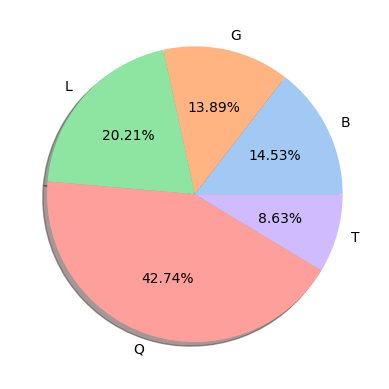

In [30]:
gb = df[df['Result']=='YES'].groupby('Sexuality')['Result'].count()
gb
labels=gb.index
data = list(gb)
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.2f%%', shadow= True)

In [38]:
ct = pd.crosstab(df['Sexuality'], df['InterviewScore'])
ct_sorted = np.sort(ct)[::-1]
ct_sorted

array([[  6,  15,  21,  31,  32],
       [ 16,  65,  84, 122, 126],
       [  9,  37,  38,  54,  64],
       [  8,  19,  34,  40,  46],
       [  5,  24,  30,  32,  42]], dtype=int64)

f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


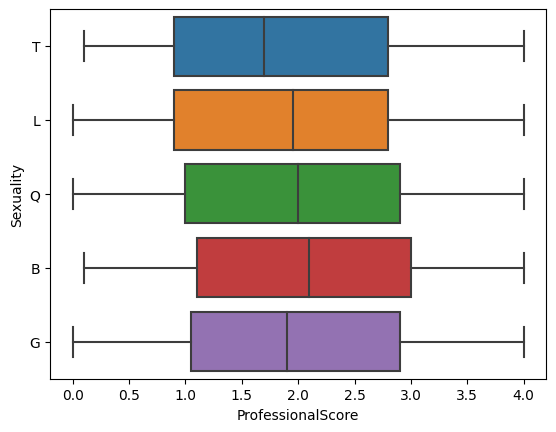

In [39]:
sns.boxplot(x='ProfessionalScore',y='Sexuality',data=df,orient='h')
plt.show()

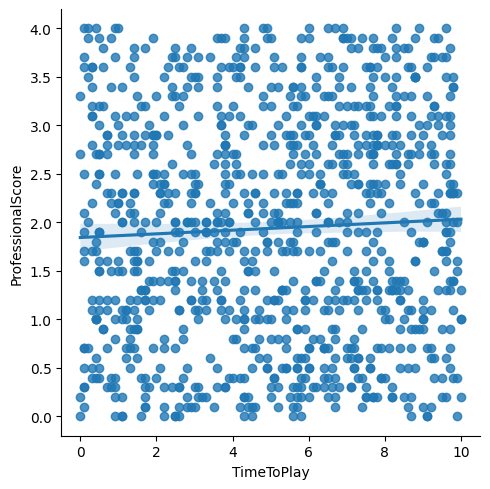

In [40]:
sns.lmplot(data=df,x='TimeToPlay',y='ProfessionalScore',fit_reg=True)
plt.show()

In [42]:
df[['TimeToPlay','ProfessionalScore']].corr()

,TimeToPlay,ProfessionalScore
TimeToPlay,1.000000,0.047634
ProfessionalScore,0.047634,1.000000


In [43]:
df[['TimeToStudy','ProfessionalScore']].corr()

,TimeToStudy,ProfessionalScore
TimeToStudy,1.000000,0.016941
ProfessionalScore,0.016941,1.000000


In [53]:
median = df['TimeToStudy'].median()
median

5.2

In [55]:
# Write your code below and press Shift+Enter to execute
pearson_coef, p_value = stats.pearsonr(df['Sexuality'], df['ProfessionalScore'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('ProfessionalScore ~ Sexuality', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Sexuality,4.0,2.501237,0.625309,0.478149,0.751816
Residual,995.0,1301.232673,1.307772,NaN,NaN


In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['TimeToPlay','TimeToStudy']].values
y=df['ProfessionalScore'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, 
                                                    random_state=18)

In [75]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

1.7946722885650128
[0.01807073 0.00967716]


In [76]:
#Lưu trữ mô hình hồi quy xuống thiết bị
import pickle
pickle.dump(model,open('a.sv','wb'))

In [77]:
#xây dựng chương trình nhập điểm T5,T6 từ bàn phím
#Hãy dự báo điểm thi NGONNGU
import pickle
loaded_model=pickle.load(open('a.sv','rb'))
vT5=float(input("Nhập T5: "))
vT6=float(input('Nhập T6: '))

predicted_vLogic=loaded_model.predict([[vT5,vT6]])
print(f'Dự báo điểm thi NGONNGU là: {predicted_vLogic}')

Dự báo điểm thi NGONNGU là: [1.95276606]


([<matplotlib.patches.Wedge at 0x2141b2c2a10>,
 [Text(1.0053679774626623, 0.44635773757451114, 'B'),
  Text(0.2969211155765594, 1.0591684715496263, 'G'),
  Text(-0.8065809029736678, 0.7479486927311144, 'L'),
  Text(-0.4145580984795792, -1.018892331399641, 'Q'),
  Text(1.0406938816998714, -0.3563091980183139, 'T')],
 [Text(0.548382533161452, 0.24346785685882422, '13.30%'),
  Text(0.16195697213266874, 0.577728257208887, '14.70%'),
  Text(-0.43995321980381874, 0.40797201421697143, '20.20%'),
  Text(-0.2261225991706795, -0.5557594534907132, '41.30%'),
  Text(0.5676512081999299, -0.19435047164635302, '10.50%')])

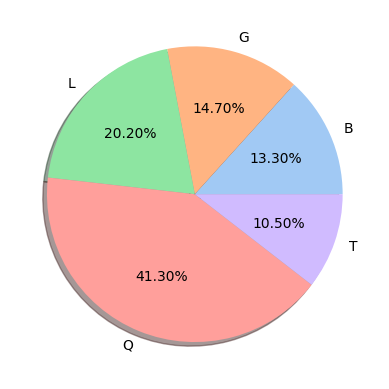

In [82]:
gb = df.groupby('Sexuality')['Sexuality'].count()
labels=gb.index
data = list(gb)
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.2f%%', shadow= True)


In [83]:
df['ProfessionalScore'].describe()

count    1000.000000
mean        1.939700
std         1.142383
min         0.000000
25%         1.000000
50%         2.000000
75%         2.900000
max         4.000000
Name: ProfessionalScore, dtype: float64

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['TimeToPlay','TimeToStudy']].values
y=df['ProfessionalScore'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [85]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

1.8525360252105272
[0.01172014 0.00968469]


In [86]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 

Score or R-squared:  -0.00402957123492409
Mean Absolute Error: 0.9957741901130668
Mean Squared Error: 1.307426976063301
Root Mean Squared Error: 1.1434277310190186
Mean Absolute percentage Error: 173654249807822.2


f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

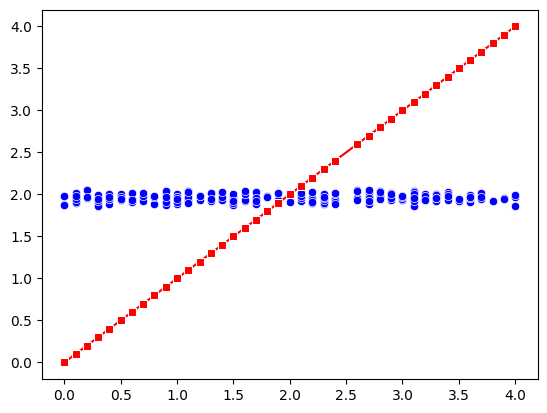

In [87]:
import seaborn  as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),marker='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),marker='o',color='b')
plt.show()

In [89]:
x=np.sort(df['ProfessionalScore'])
x

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.

In [95]:
ct = pd.crosstab(df['Sexuality'], df['InterviewScore'])
ct.mode()
# min_value = total * min(ct.values/total) 
# min_value

InterviewScore,A,B,C,D,F
0,5,15,30,32,21
1,6,19,31,42,32
2,8,24,40,46,34
3,9,37,64,54,38
4,16,65,126,122,84


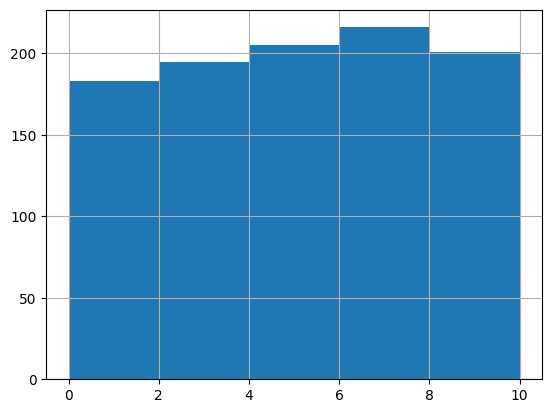

In [96]:
df['TimeToStudy'].hist(bins=5)
plt.show()

In [106]:
pv = pd.pivot_table(df, values='TimeToPlay', index=[ 'Sexuality'], 
                    columns='Result')


In [110]:
df['TimeToStudy'].describe()

count    1000.000000
mean        5.064000
std         2.843235
min         0.000000
25%         2.700000
50%         5.200000
75%         7.400000
max        10.000000
Name: TimeToStudy, dtype: float64

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('Result ~ Sexuality', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table


ValueError: endog has evaluated to an array with multiple columns that has shape (1000, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\tai lieu\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sexuality', ylabel='ProfessionalScore'>

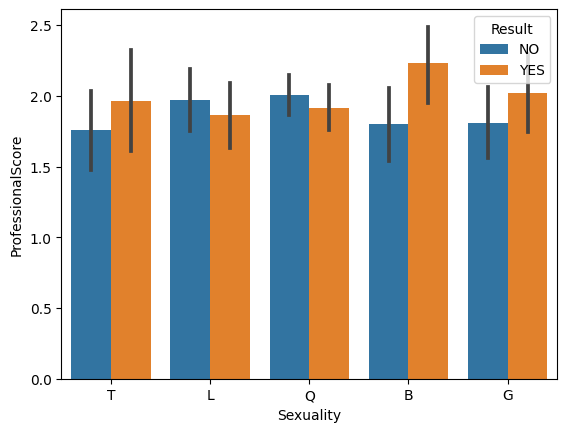

In [112]:
sns.barplot(x='Sexuality', y='ProfessionalScore', hue='Result', data=df)